In [1]:
import matplotlib.pyplot as plt
from datasets import FlickrDataset
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from tqdm import tqdm
from models import ResNet34
from models import SiameseNetwork
import random
from distances import *
from feats import ImageFlickrFeatures
from ranking import Ranker
from os import listdir
from eval import Evaluator
from metrics import *
from similarities import *
#import utils.imgproc as imgproc

In [12]:
imagenet_net = ResNet34()
sketches_net = ResNet34()

print("Adapting output layers...")
#.adapt_fc()
#imagenet_net.adapt_fc()

siamese_net = SiameseNetwork(sketches_net, imagenet_net)
siamese_net.load_state_dict(torch.load(r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\T2\best_SiameseNetwork_triplet.pth'))
siamese_net.eval()

s = torch.nn.CosineSimilarity()
flickr_dataset = ImageFlickrFeatures("dbs/features_triplet.db")
r = Ranker('B:\Flickr\Flickr15K',
           image_dataset_features=flickr_dataset,
           feature_extractor=siamese_net,
           similarity_fn=s)

Adapting output layers...
14501 images loaded successfully


In [3]:
def show_retrieval(query, path_resultados):
    plt.figure()                            #creamos la figura

    fig = plt.figure(figsize=(10, 4))      #Tamaño de la figura, se puede reducir o variar la proporcion cambiando el figsize
    a = fig.add_subplot(2, 5, 1)           
                                            
    plt.imshow(Image.open(query), cmap='Greys_r')   #graficamos la imagen
    plt.axis('off')                         #le quitamos los ejes a la imagen



    # Plot top 9 retrieval images
    for i in range(9):
        a = fig.add_subplot(2, 5, i + 2)    # las posiciones de los retrieval van del 6 al 15
        image = Image.open('B:/Flickr'+path_resultados[i][0][4:])# imgproc.process_image(data.read_image(path_resultados[i], 3), target_size) #cargamos la imagen
        plt.imshow(image, cmap='Greys_r')       #mostramos la imagen
        plt.axis('off')                             #le quitamos los ejes a la imagen
    #plt.savefig(filename)              #mostramos la figura
    plt.show()
    plt.close()

In [4]:
d = []
with open('B:\Flickr\Flickr15K\query_class.txt') as source:
    for line in source:
        fields = line.split('\t')
        f = fields[1][:-1]
        d.append([fields[0],int(f)])

In [5]:
def crear_diccionario_listas(n):
    diccionario = {}

    for i in range(1, n + 1):
        diccionario[i] = []
    
    return diccionario


In [15]:
qpc= crear_diccionario_listas(33)
for j in range(1,34):
    for i in range(len(d)):
        if d[i][1] == j:
            qpc[j].append(d[i][0])
    

In [20]:
queries = []
for i in range(1,34):
    nr = np.random.randint(10)
    queries.append('B:/Flickr/Flickr15K/queries/'+qpc[i][nr])

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3565.90it/s]


<Figure size 432x288 with 0 Axes>

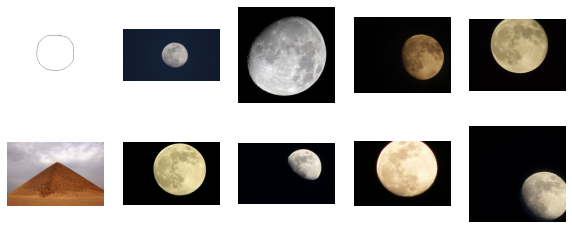

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3545.14it/s]


<Figure size 432x288 with 0 Axes>

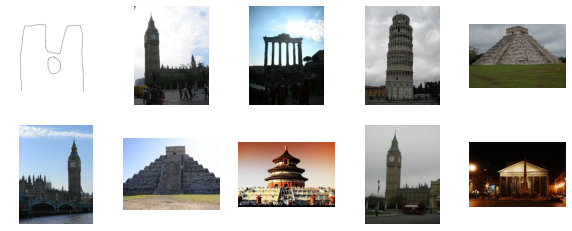

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3445.10it/s]


<Figure size 432x288 with 0 Axes>

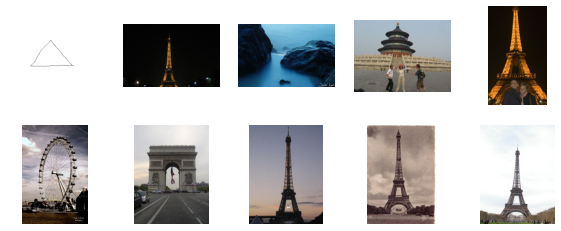

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3332.04it/s]


<Figure size 432x288 with 0 Axes>

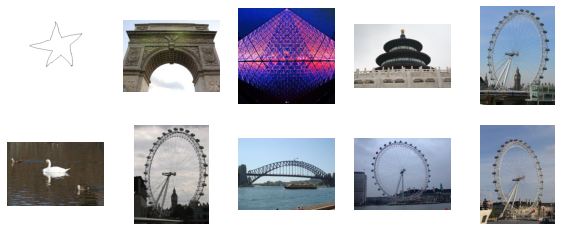

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3319.94it/s]


<Figure size 432x288 with 0 Axes>

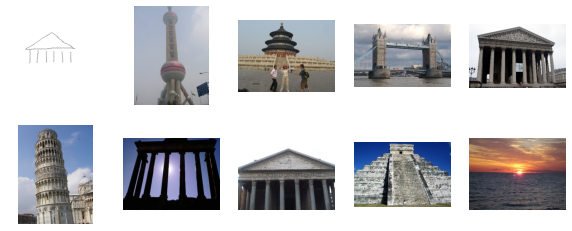

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3371.85it/s]


<Figure size 432x288 with 0 Axes>

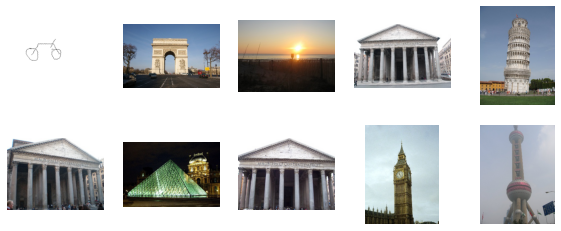

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3587.09it/s]


<Figure size 432x288 with 0 Axes>

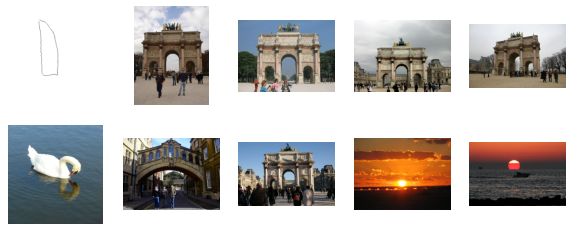

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 2979.01it/s]


<Figure size 432x288 with 0 Axes>

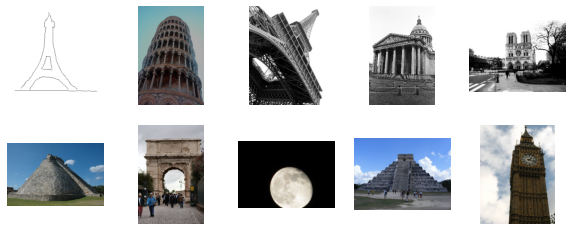

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3293.02it/s]


<Figure size 432x288 with 0 Axes>

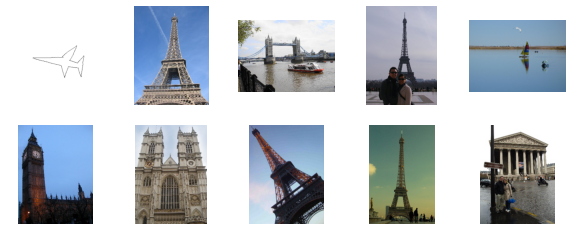

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3223.69it/s]


<Figure size 432x288 with 0 Axes>

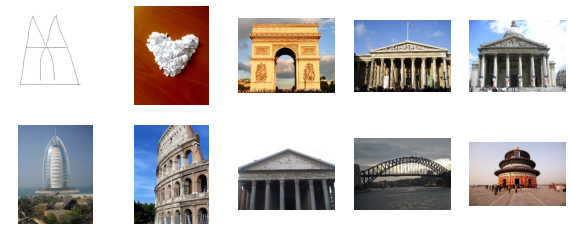

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3518.04it/s]


<Figure size 432x288 with 0 Axes>

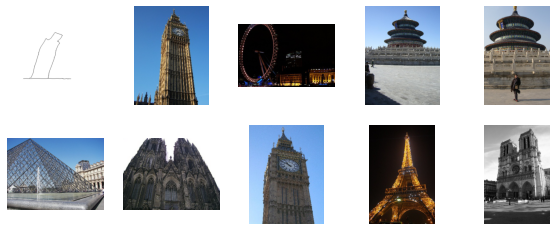

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3655.25it/s]


<Figure size 432x288 with 0 Axes>

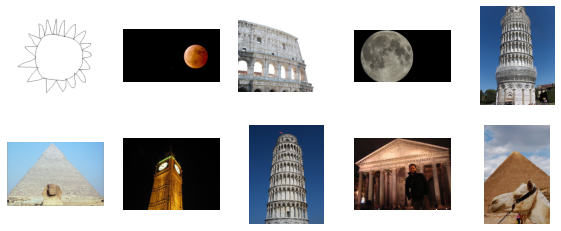

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3372.00it/s]


<Figure size 432x288 with 0 Axes>

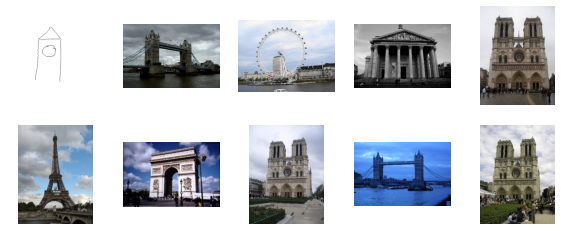

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3538.47it/s]


<Figure size 432x288 with 0 Axes>

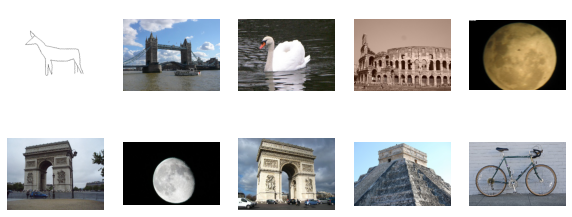

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3535.06it/s]


<Figure size 432x288 with 0 Axes>

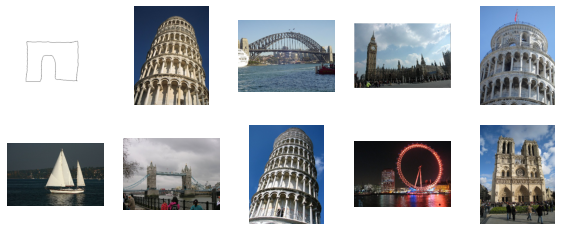

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3583.57it/s]


<Figure size 432x288 with 0 Axes>

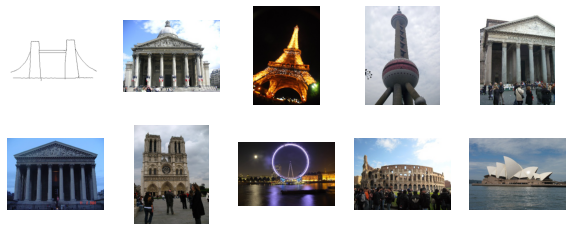

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3514.66it/s]


<Figure size 432x288 with 0 Axes>

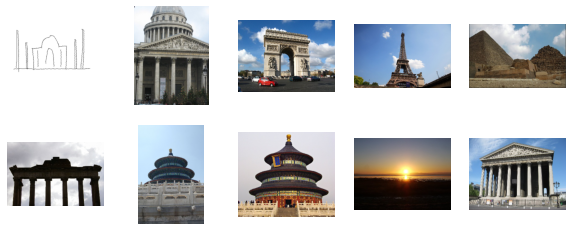

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3524.83it/s]


<Figure size 432x288 with 0 Axes>

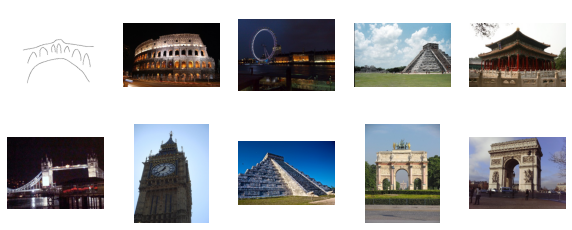

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3063.77it/s]


<Figure size 432x288 with 0 Axes>

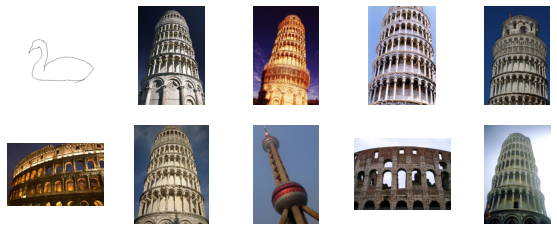

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3325.98it/s]


<Figure size 432x288 with 0 Axes>

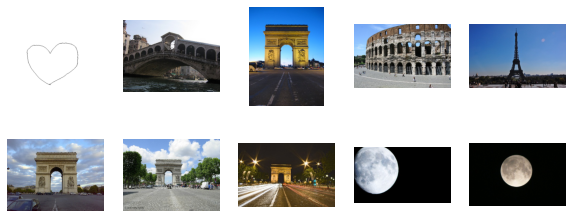

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3005.96it/s]


<Figure size 432x288 with 0 Axes>

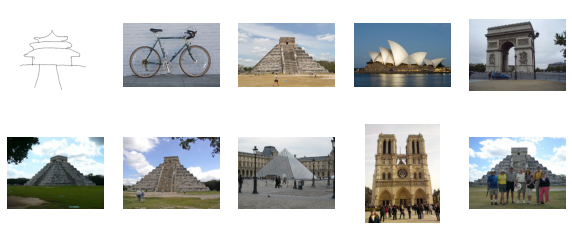

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3504.55it/s]


<Figure size 432x288 with 0 Axes>

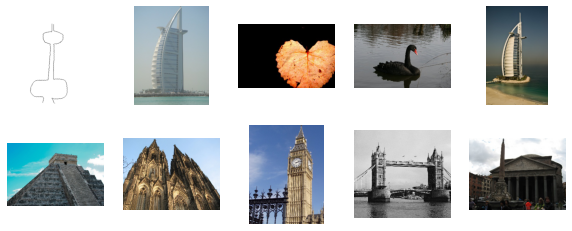

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3619.05it/s]


<Figure size 432x288 with 0 Axes>

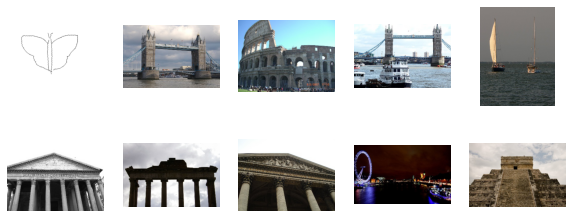

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3432.16it/s]


<Figure size 432x288 with 0 Axes>

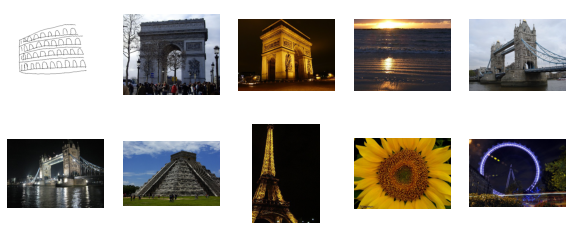

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3640.68it/s]


<Figure size 432x288 with 0 Axes>

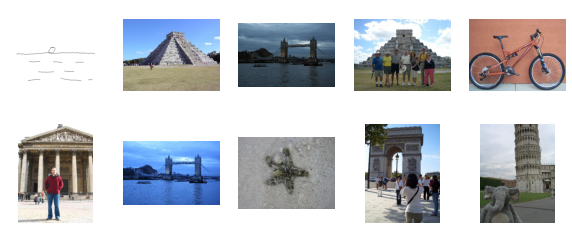

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3604.78it/s]


<Figure size 432x288 with 0 Axes>

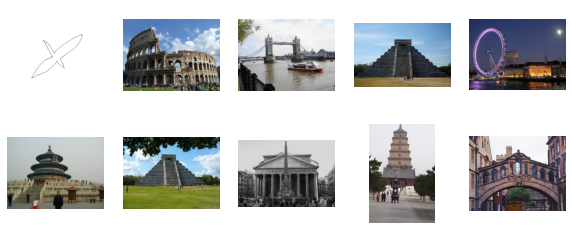

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3507.92it/s]


<Figure size 432x288 with 0 Axes>

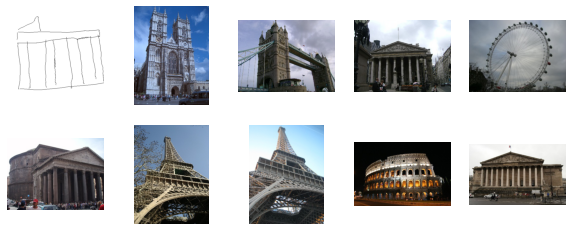

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3423.63it/s]


<Figure size 432x288 with 0 Axes>

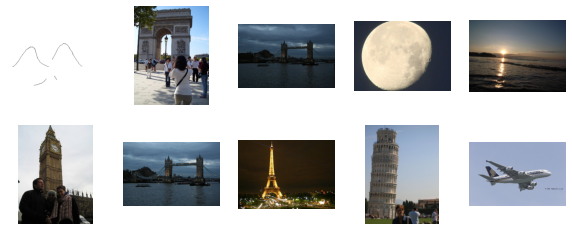

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3576.56it/s]


<Figure size 432x288 with 0 Axes>

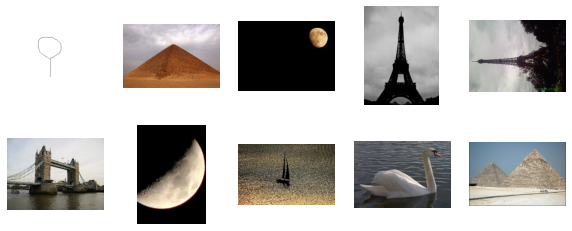

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3145.65it/s]


<Figure size 432x288 with 0 Axes>

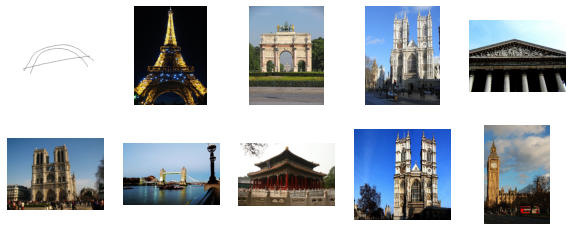

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3134.86it/s]


<Figure size 432x288 with 0 Axes>

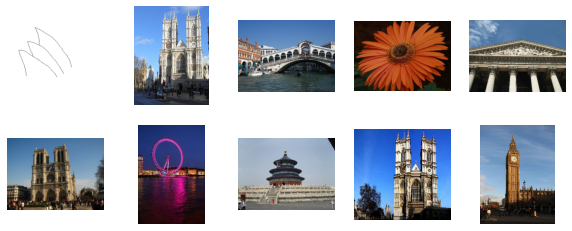

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3092.43it/s]


<Figure size 432x288 with 0 Axes>

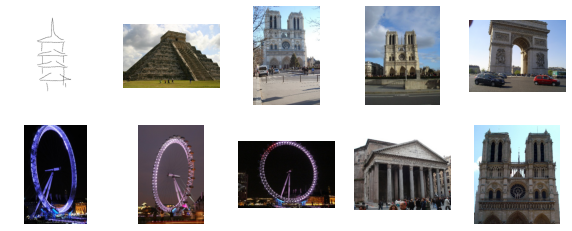

Querying: 100%|██████████████████████████████████████████████████████████████████| 1813/1813 [00:00<00:00, 3662.58it/s]


<Figure size 432x288 with 0 Axes>

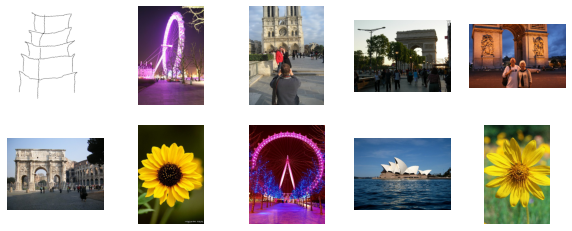

In [21]:
for i in range(len(queries)):
    c,k = r.get_rank(queries[i])
    show_retrieval(queries[i],k)